# Proyecto Final

### **Contexto**
#### <div style="text-align: justify"> Una startup es una empresa o proyecto iniciado por un emprendedor para buscar, desarrollar y validar un modelo económico escalable. Mientras que la iniciativa empresarial se refiere a todos los nuevos negocios, incluyendo el autoempleo y las empresas que nunca tienen la intención de registrarse, las startups se refieren a los nuevos negocios que pretenden crecer más allá del fundador en solitario. Las startups se enfrentan a una gran incertidumbre y tienen altas tasas de fracaso, pero una minoría de ellas llega a tener éxito e influencia. Algunas startups se convierten en unicornios: empresas emergentes de propiedad privada valoradas en más de 1.000 millones de dólares. [Fuente de información: Wikipedia] </div>
#### <div style="text-align: justify"> Las startups desempeñan un papel fundamental en el crecimiento económico. Aportan nuevas ideas, estimulan la innovación y crean empleo, moviendo así la economía. En los últimos años se ha producido un crecimiento exponencial de las startups. Predecir el éxito de una startup permite a los inversores encontrar empresas con potencial de crecimiento rápido, lo que les permite ir un paso por delante de la competencia.
</div>

### **Objetivo**
#### <div style="text-align: justify"> El objetivo es predecir si una startup que está operando actualmente se convierte en un éxito o en un fracaso. El éxito de una empresa se define como el acontecimiento que proporciona a los fundadores de la empresa una gran suma de dinero a través del proceso de M&A (Merger and Acquisition) o de una IPO (Initial Public Offering). Una empresa se consideraría fracasada si tuviera que cerrar.</div>
### **Inspiración**
#### <div style="text-align: justify"> Predecir el éxito de una startup permite a los inversores encontrar empresas con potencial de crecimiento rápido, lo que les permite ir un paso por delante de la competencia.</div>

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates # Permite controlar fechas en las visualizaciones
from datetime import datetime

# Estilo de los gráficos
sns.set()

# Scikit Learn & PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defino función para hacer un preview del dataframe y obtener la forma del DataFrame
def df_preview(df, n):
    a = display(pd.concat([df.head(n), df.tail(n)]))
    b = 'El dataframe contiene '+ str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas'
    return b

In [3]:
# Se carga el dataset
df_1 = pd.read_csv('startup data.csv')
df_preview(df_1, 3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.00,1,acquired
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.00,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.00,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.00,1,acquired


'El dataframe contiene 923 filas y 49 columnas'

## Etapa Exploratoria de los Datos (EDA)

#### <div style="text-align: justify"> El DataFrame contiene 923 registros de diferentes Start-ups caracterizadas por múltiples atributos (columnas) y una columna en particular llamada 'status' la cual indica si la misma fue un éxito (acquired) o un fracaso (closed) </div>

In [4]:
list(df_1.columns) # Devuelve una lista con el nombre de las 49 columnas que conforman al DataFrame

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [5]:
df_1.info() # Devuelve información relevante sobre cada una de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [6]:
df_1['status'].unique() # Se verifica que la columna 'status' es del tipo binaria

array(['acquired', 'closed'], dtype=object)

In [7]:
df_1['status'].value_counts() # Se verifica que exista un cierto balance en los datos

acquired    597
closed      326
Name: status, dtype: int64

### **Análisis de datos faltantes**
#### Se analiza la cantidad de NAs por columna y su incidencia.

In [8]:
df_1.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
dict_1 = df_1.isnull().sum().to_dict()
list_na = [] # Inicio lista para incluir las columnas que contengan NAs
for key, value in dict_1.items():
            if value > 0:
                list_na.append((key, value))

# Print de la lista que contiene NAs ordenados de mayor a menor
list_na = sorted(list_na, key=lambda x: x[1], reverse=True)
print(list_na)

[('closed_at', 588), ('Unnamed: 6', 493), ('age_first_milestone_year', 152), ('age_last_milestone_year', 152), ('state_code.1', 1)]


#### Como se puede ver predominan los NAs en las primeras 4 columnas, mientras que en 'state_code.1' se podría decir que es insignificante.

## **EDA - Análisis Univariado**

#### A continuación, para identificar valores anómalos, se harán boxplots con distintas variables.

<AxesSubplot:ylabel='age_first_funding_year'>

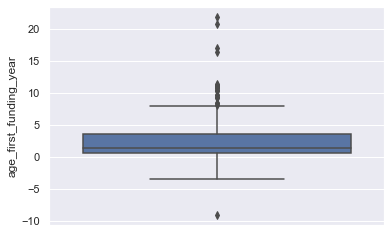

In [10]:
# Tiempo que llevaba abierta la compañía al momento de la primera inversión
sns.boxplot(y = 'age_first_funding_year',  data = df_1)

<AxesSubplot:ylabel='age_last_funding_year'>

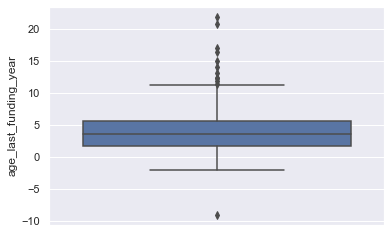

In [11]:
# Tiempo que llevaba abierta la compañía al momento de la última inversión
sns.boxplot(y = 'age_last_funding_year', data = df_1)

<AxesSubplot:ylabel='age_first_milestone_year'>

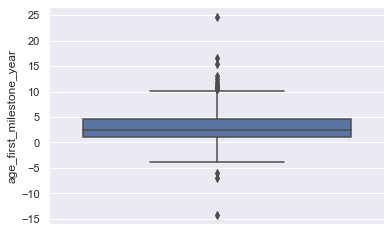

In [12]:
# Tiempo que llevaba abierta la compañía al momento del primer hito alcanzado
sns.boxplot(y = 'age_first_milestone_year', data = df_1)

<AxesSubplot:ylabel='age_last_milestone_year'>

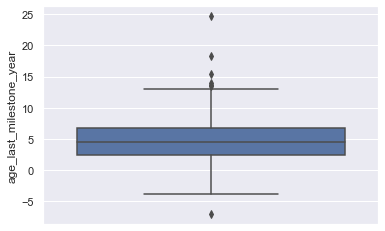

In [13]:
# Tiempo que llevaba abierta la compañía al momento del último hito alcanzado
sns.boxplot(y = 'age_last_milestone_year', data = df_1)

#### Fecha de fundación de cada una de las start-ups

In [14]:
# La columna 'founded_at' indica la fecha de fundación de c/u
df_1['founded_at']

0       1/1/2007
1       1/1/2000
2      3/18/2009
3       1/1/2002
4       8/1/2010
         ...    
918     1/1/2009
919     1/1/1998
920     1/1/1999
921     1/1/2009
922     1/1/2003
Name: founded_at, Length: 923, dtype: object

In [15]:
# Se modifica a tipo DateTime
df_1['founded_at'] = pd.to_datetime(df_1['founded_at'])
df_1['founded_at']

0     2007-01-01
1     2000-01-01
2     2009-03-18
3     2002-01-01
4     2010-08-01
         ...    
918   2009-01-01
919   1998-01-01
920   1999-01-01
921   2009-01-01
922   2003-01-01
Name: founded_at, Length: 923, dtype: datetime64[ns]

In [16]:
# Creo una nueva columna que indique el año en que fue creada c/u
df_1['foundation_year'] = df_1['founded_at'].dt.year
df_1['foundation_year'] # La columna 'foundation_year' pasa a ser un integer

0      2007
1      2000
2      2009
3      2002
4      2010
       ... 
918    2009
919    1998
920    1999
921    2009
922    2003
Name: foundation_year, Length: 923, dtype: int64

In [17]:
# Creo un nuevo DF con el año de fundación y nombre de c/u
df_foundation = df_1[['foundation_year', 'name']]
df_preview(df_foundation, 3)

,foundation_year,name
0,2007,Bandsintown
1,2000,TriCipher
2,2009,Plixi
920,1999,Paracor Medical
921,2009,Causata
922,2003,Asempra Technologies


'El dataframe contiene 923 filas y 2 columnas'

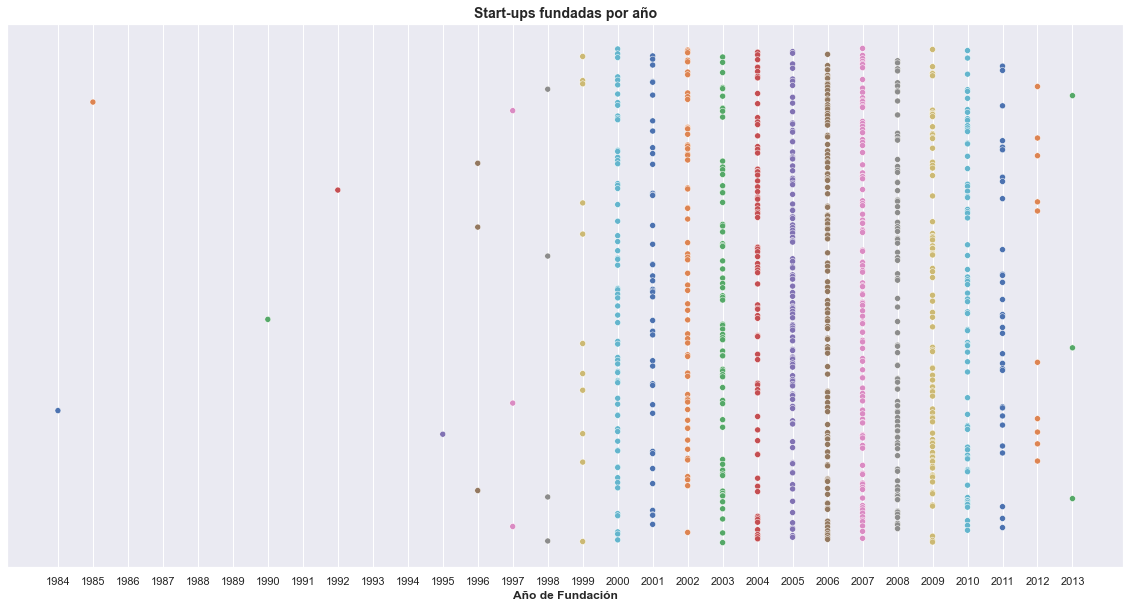

In [18]:
# Graficar la fecha de fundación de cada una de las start-ups
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.scatterplot(data=df_foundation, x='foundation_year', y='name',
                     hue='foundation_year', palette='deep', legend=False)

ax.set_title('Start-ups fundadas por año', fontsize=14,fontweight='bold')
ax.set_xlabel('Año de Fundación', fontsize=12, fontweight='bold')
ax.set(
       ylabel=None,
       yticks=[],
       xticks=np.arange(df_foundation['foundation_year'].min(),
                        df_foundation['foundation_year'].max() + 1, 1 )
      )


plt.show();

#### Se puede ver que el rango de fundación (en escala anual) es desde 1984 a 2013 y que en ciertos años no se fundaron Start-Ups.

In [19]:
# Groupby year and count
df_foundation.groupby('foundation_year').agg({'count'})

,name
,count
foundation_year,
1984,1
1985,1
1990,1
1992,1
1995,1
1996,3
1997,3
1998,4


In [20]:
# Get: El año en que más Start-Ups se fundaron
print(df_foundation.groupby('foundation_year').agg({'count'}).max(), 
      df_foundation.groupby('foundation_year').agg({'count'}).idxmax()
     )

name  count    107
dtype: int64 name  count    2006
dtype: int64


In [21]:
# Agrupar por rubro y contar

In [22]:
df_1['category_code'] # La columna 'category_code' indica el rubro al cual pertenece c/u

0            music
1       enterprise
2              web
3         software
4      games_video
          ...     
918    advertising
919       security
920        biotech
921       software
922       security
Name: category_code, Length: 923, dtype: object

In [23]:
_ = df_1.groupby('category_code').agg({'name' : 'count'}).sort_values(by='name', ascending=False).reset_index()
_ = _.rename(columns={'category_code' : 'Rubro',
                      'name':'Count'})
display(_)

,Rubro,Count
0,software,153
1,web,144
2,mobile,79
3,enterprise,73
4,advertising,62
5,games_video,52
6,semiconductor,35
7,network_hosting,34
8,biotech,34
9,hardware,27


In [24]:
# Reemplazar guiones por espacios y capitalizar las primeras letras para emprolijar la visualización.
_['Rubro'] = _['Rubro'].replace('_', ' ', regex=True)
_['Rubro'] = _['Rubro'].str.capitalize()
display(_)

,Rubro,Count
0,Software,153
1,Web,144
2,Mobile,79
3,Enterprise,73
4,Advertising,62
5,Games video,52
6,Semiconductor,35
7,Network hosting,34
8,Biotech,34
9,Hardware,27


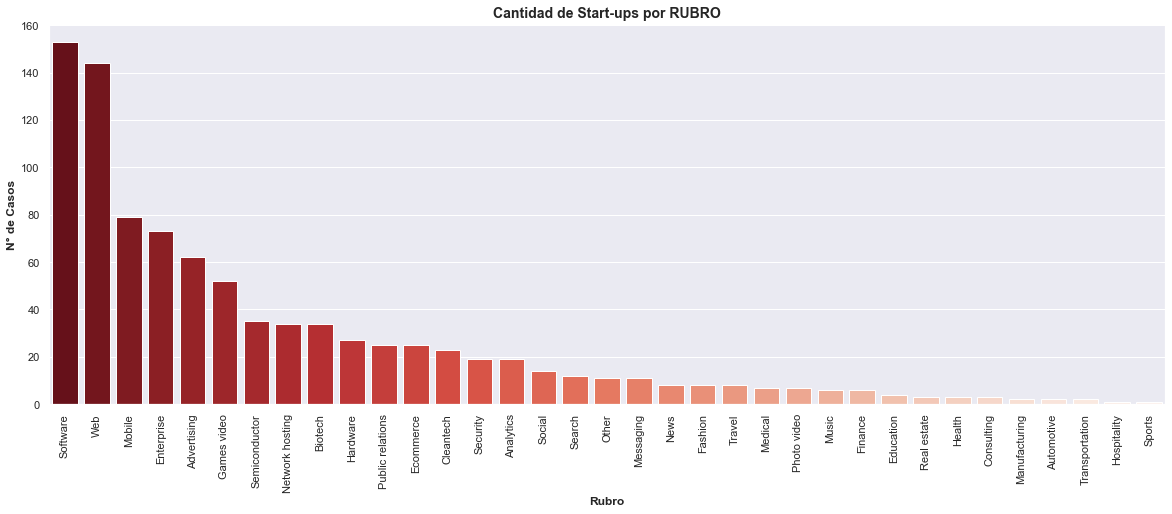

In [25]:
# Gráfico de barras por c/ rubro
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

ax = sns.barplot(x='Rubro', y='Count', data=_, palette='Reds_r')

ax.set_title('Cantidad de Start-ups por RUBRO',fontsize=14, fontweight='bold' )
ax.set_xlabel('Rubro', fontsize=12, fontweight='bold')
ax.set_ylabel('N° de Casos', fontsize=12, fontweight='bold')

plt.xticks(rotation=90)

plt.show();

#### De la visualización se puede observar que predominan fuertemente 2 rubros. A saber; el rubro Software y el rubro Web.

In [26]:
# Se calcula el % que aglomeran c/rubro c/ respecto al total y la sumatoria acumulada.
_['%'] = 100 * (_['Count'] / _['Count'].sum())
_['%_cumsum'] = _['%'].cumsum()
_

,Rubro,Count,%,%_cumsum
0,Software,153,16.576381,16.576381
1,Web,144,15.601300,32.177681
2,Mobile,79,8.559047,40.736728
3,Enterprise,73,7.908992,48.645720
4,Advertising,62,6.717226,55.362947
5,Games video,52,5.633803,60.996750
6,Semiconductor,35,3.791983,64.788732
7,Network hosting,34,3.683640,68.472373
8,Biotech,34,3.683640,72.156013
9,Hardware,27,2.925244,75.081257


#### Se puede ver que los 2 primeros rubros incluyen un poco más del 30% del dataset y que los primeros 5 representan aproximadamente el 60%.

## **EDA - Análisis Bivariado**

#### En esta oportunidad, se realizaran algunas visualizaciones bivariadas. El objetivo será entonces, encontrar relaciones de diverso tipo y que permitan de laguna manera comprender mejor el dataset y la causalidad entre las variables que lo componen.

#### Se retoma el análisis de valores negativos en la variables relacionadas con la edad de una start-up. 

In [27]:
# Cuenta la cantidad de casos en que la variable edad toma valores negativos
print(
    df_1.loc[df_1['age_first_funding_year']<0].shape[0],
    df_1.loc[df_1['age_last_funding_year']<0].shape[0],
    df_1.loc[df_1['age_first_milestone_year']<0].shape[0],
    df_1.loc[df_1['age_last_milestone_year']<0].shape[0]
)

46 13 46 12


#### Las variables relacionadas con la edad de la startup representan la diferencia en el tiempo (entre 2 fechas) atribuible a un  dado suceso.
#### Son muchos los casos en que la esta toma valores negativos. Esto podría ser un error o no necesariamente. Las distintas variables relacionadas con las edad miden la diferencia temporal con respecto a la fecha de fundación de la startup y por alguna razon esta no obligatoriamente es anterior al año en que recibieron la primer inversión o 'milestone' por ejemplo.
#### Otro criterio podría ser considerar que los casos en que esto ocurra es un error y por lo tanto dichos valores deben ser eliminados. **Este es el criterio que se adoptará de aquí en adelante.**

In [28]:
# Se crea un nuevo DF en donde todos las filas que contengan 
# algun valor de edad negativa seon eliminados.
df_2 = df_1.drop(df_1[
(df_1['age_first_funding_year']<0) |
(df_1['age_last_funding_year']<0) |
(df_1['age_first_milestone_year']<0) |
(df_1['age_last_milestone_year']<0)
].index)

print(
    df_2.shape,
    df_1.shape,
    df_1.shape[0] - df_2.shape[0] # Indica la cantidad de filas con valores negativos.
)

(840, 50) (923, 50) 83


#### Como primera visualización bivariada se propone  graficar ['age_first_funding_year'] vs ['age_first_milestone_year'] considerando por un lado todos los casos y por el otro eliminando aquellos en que la edad toma valores negativos.

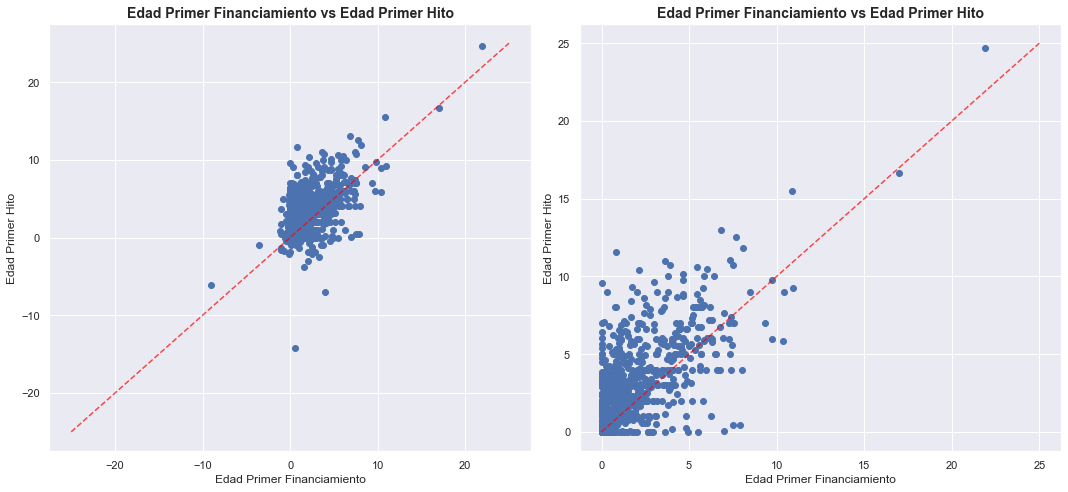

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].scatter(df_1['age_first_funding_year'], df_1['age_first_milestone_year'])

axs[0].plot(
            np.arange(-25, 26), np.arange(-25, 26),
            linestyle='dashed', color='red', alpha=0.7
) # x=y de referencia

axs[1].scatter(df_2['age_first_funding_year'], df_2['age_first_milestone_year'])

axs[1].plot(
            np.arange(0, 26), np.arange(0, 26),
            linestyle='dashed', color='red', alpha=0.7
) # x=y de referencia


for i in [0,1]:
    axs[i].set_xlabel('Edad Primer Financiamiento')
    axs[i].set_ylabel('Edad Primer Hito')
    axs[i].set_title('Edad Primer Financiamiento vs Edad Primer Hito', fontsize=14, fontweight='bold')

fig.tight_layout()
plt.show();

#### La linea a 45° sirve de referencia para identificar startups en donde la edad del primer 'milestone' es superior o posterior a la de la primera inversión (lo cual es lo más lógico) o viceversa.

#### Se propone ahora graficar en un stripplot (similar al scatterplot pero incorpora jitter para no superponer datos) la relación entre la cantidad de relaciones ['relationships'] y la cantidad de hitos ['milestones'] y también hacer una distinción entre los casos en que cuentan con un [patrón](https://es.wikipedia.org/wiki/Inversor_%C3%A1ngel) o no.


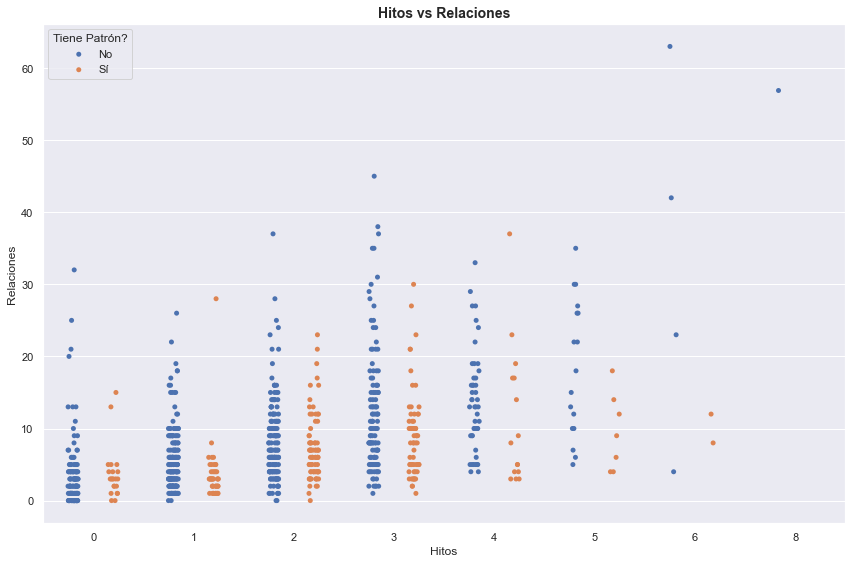

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax = sns.stripplot(
                    data=df_1, x='milestones', y='relationships',
                    hue='has_angel', dodge=True
)
ax.set_xlabel('Hitos')
ax.set_ylabel('Relaciones')
ax.set_title('Hitos vs Relaciones', fontsize=14, fontweight='bold')

plt.legend(title='Tiene Patrón?', loc='upper left', labels=['No', 'Sí'])

fig.tight_layout()
plt.show();

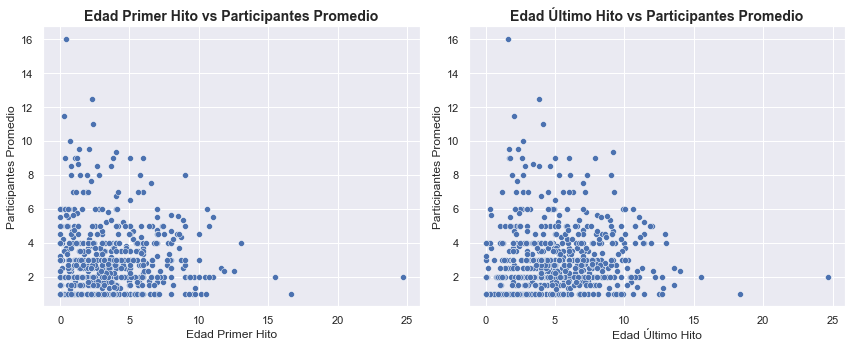

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs_0 = sns.scatterplot(ax=axs[0], data=df_2, x='age_first_milestone_year', y='avg_participants')
axs_1 = sns.scatterplot(ax=axs[1], data=df_2, x='age_last_milestone_year', y='avg_participants')

axs[0].set_xlabel('Edad Primer Hito')
axs[0].set_ylabel('Participantes Promedio')
axs[0].set_title('Edad Primer Hito vs Participantes Promedio', fontsize=14, fontweight='bold')

axs[1].set_xlabel('Edad Último Hito')
axs[1].set_ylabel('Participantes Promedio')
axs[1].set_title('Edad Último Hito vs Participantes Promedio', fontsize=14, fontweight='bold')


fig.tight_layout()
plt.show();

#### Algunas observaciones de este gráfico:
#### - En algunos casos el primer y último hito es coincidente. 
#### - El "baricentro" del 2do gráfico se enceuntra más desplazado hacia la derecha, lo cual es lógico ya que generalmente las startups tienen mayor edad con respecto a su primer hito.
#### - No necesariamente, más participantes implica que el primer o último hito sea más temprano.

#### Finalmente, analizaremos el progreso de las startups adquiridas en el tiempo. Para ello, cambiaremos la columna founded_at para que muestre solo el año.

In [32]:
# Cambiando la columna founded_at para que solo presente el año
df_2['founded_at'] = pd.to_datetime(df_2['founded_at'])
df_2['founded_at'] = df_2['founded_at'].dt.to_period('Y')

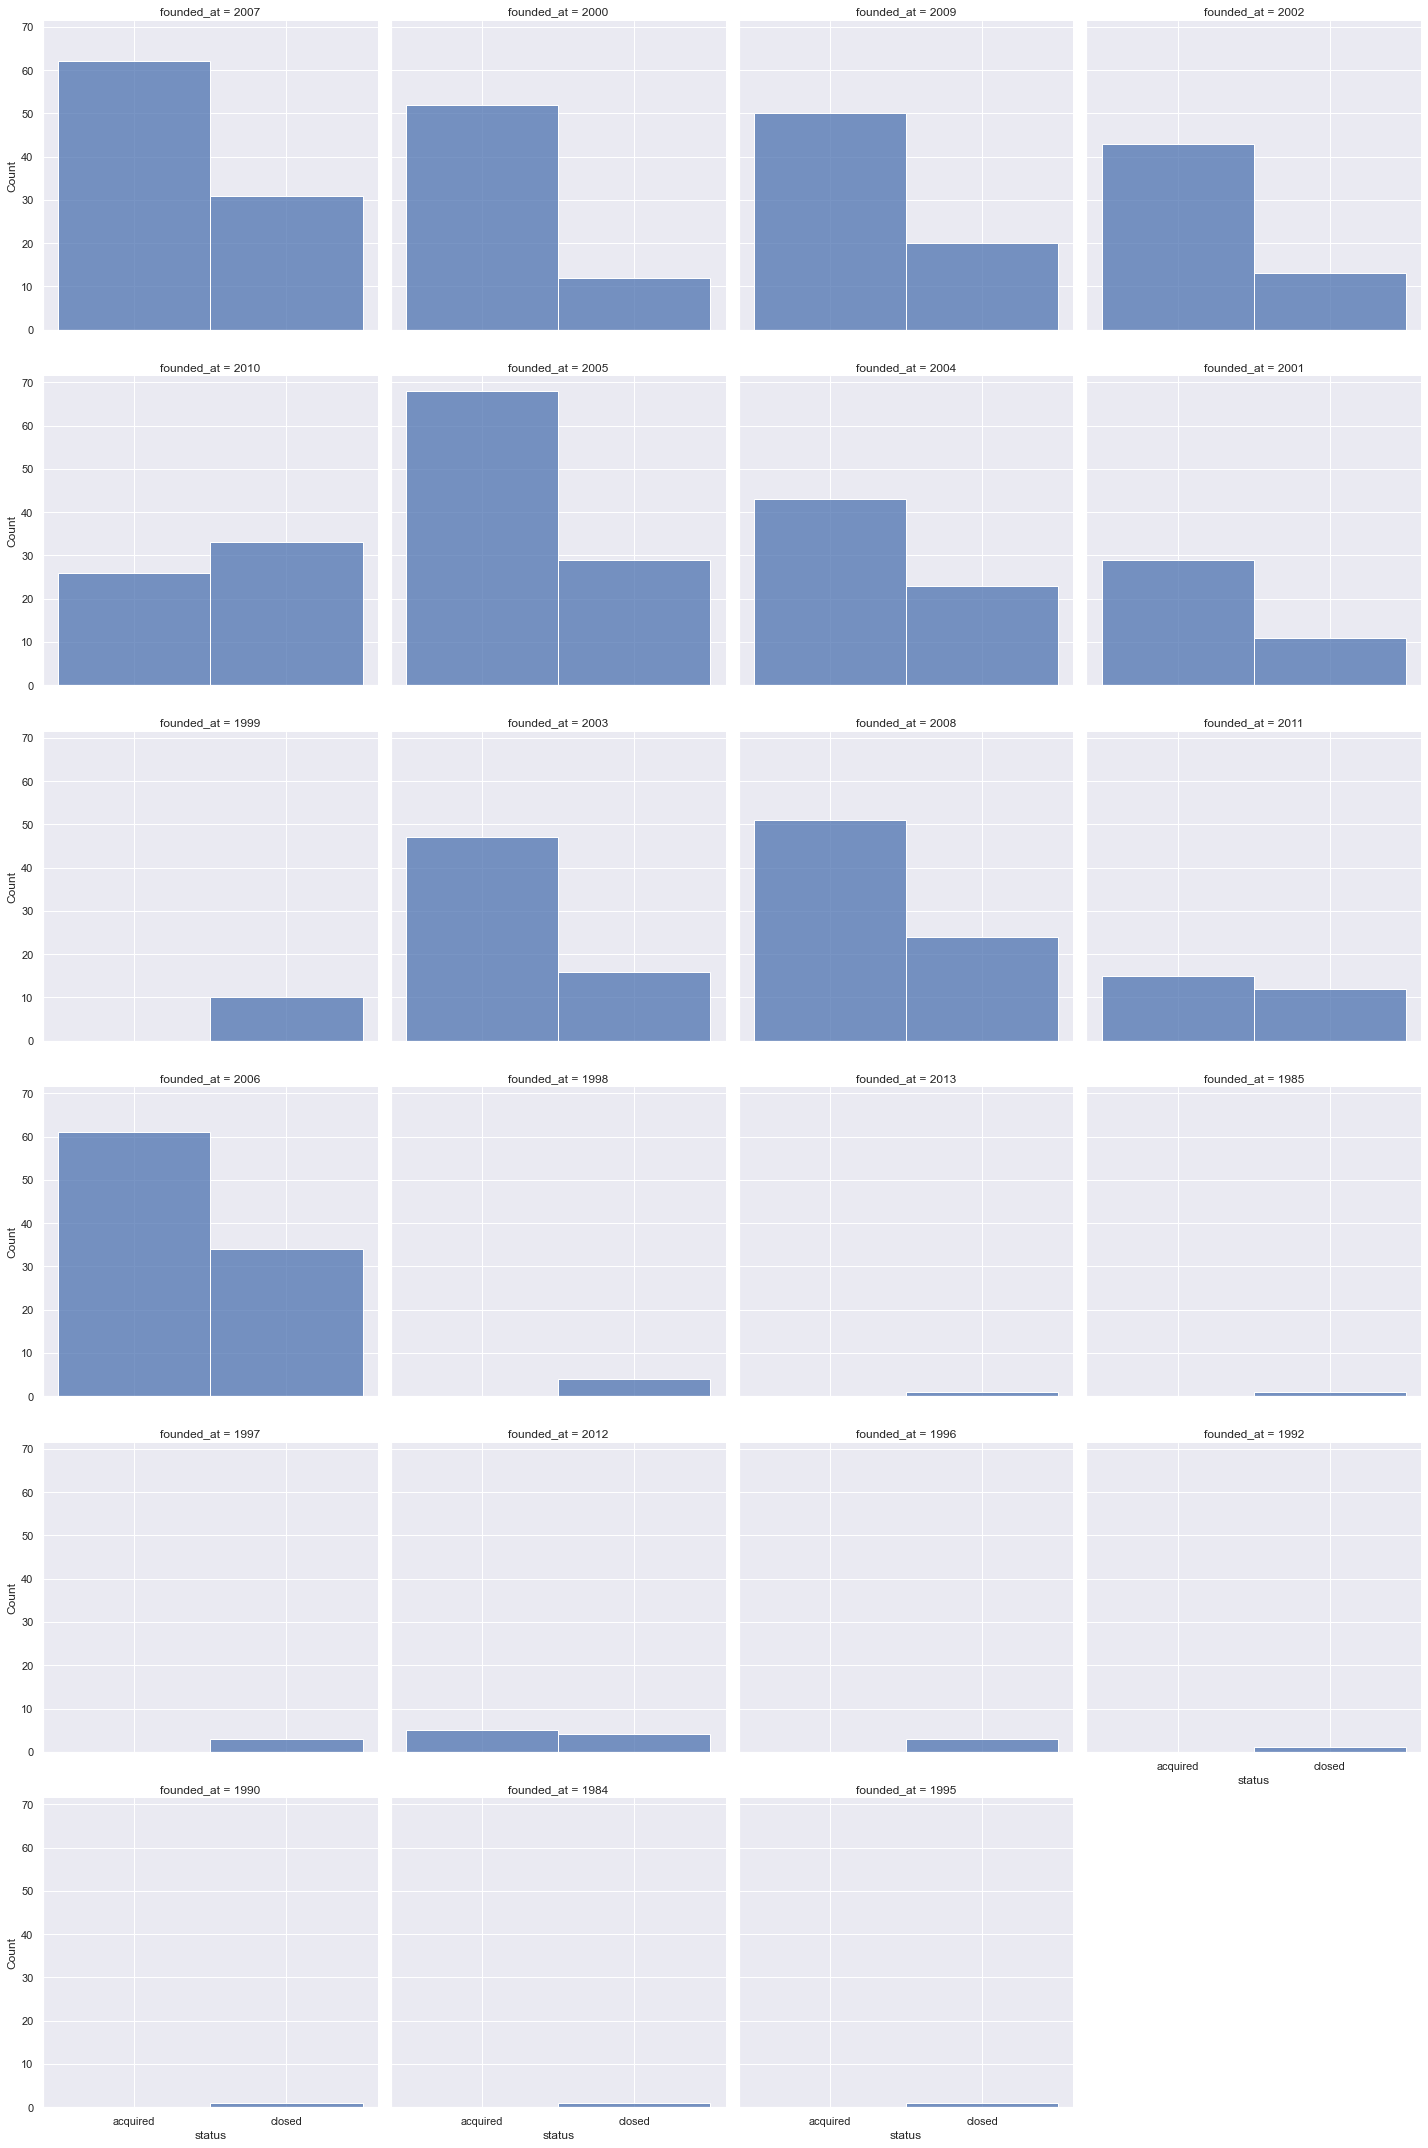

In [33]:
# Se crea el gráfico para compararlo con los valores de status
sns.displot(data = df_2, col = 'founded_at', col_wrap = 4, x = 'status')

#### El período 2005-2009 es donde más startups fueron adquiridas. El período 2000-2002 también parece haber sido bueno. Los números empeoran en períodos anteriores o posteriores a estos, exceptuando a 2004 que no tuvo un desempeño destacable.

## **Análisis Multivariado**
#### Para el análisis multivariado del proyecto, se propone realizar un Análisis de Componentes Principales (en adelante ACP).
#### ACP es un procedimiento matemático/estadístico que busca reducir la dimensionalidad del dataset máximizando la varianza explicada. 

####  El ACP es aplicable a variables de naturaleza numérica y por lo tanto, es aplicable a las siguientes columnas:

In [34]:
df_ACP = df_2[[
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'relationships',
    'funding_rounds',
    'funding_total_usd',
    'milestones',
    'avg_participants'
]]
df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1.0000
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,4.7500
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,4.0000
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,3.3333
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1.0000


#### También es necesario verificar que no existan datos faltantes antes de comenzar con el ACP.

In [35]:
df_ACP.isna().sum()

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    144
age_last_milestone_year     144
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
avg_participants              0
dtype: int64

#### Seguramente se trate de startups que a la fecha no han tenido ningún hito y por lo tanto no se les puede atribuir un valor lógico. Se decide eliminar estos valores para este análisis.

In [36]:
df_ACP = df_ACP.dropna() # Elimina NAs

In [37]:
df_ACP.isna().sum()

age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
avg_participants            0
dtype: int64

#### También, y con el objetivo de reducir posibles sezgos, se recomienda normalizar la información previamente.

In [38]:
# Inicilización del scaler
scaler = StandardScaler()
# Fit Transform
df_ACP[df_ACP.columns] = scaler.fit_transform(df_ACP[df_ACP.columns]) # df con los datos normalizados

df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,0.027985,-0.349364,0.459388,0.552725,-0.764592,0.438626,-0.128624,0.706282,-0.987782
1,1.290448,2.099689,1.296209,0.649432,0.045387,1.155253,0.053828,-1.052473,0.953423
2,-0.505842,-1.039060,-0.690390,-0.890698,-0.494599,-0.994630,-0.118405,-0.173096,0.565182
3,0.415146,0.460288,0.937131,0.327673,-0.494599,0.438626,0.053369,-1.052473,0.220062
4,-0.959139,-0.816514,-1.198534,-1.586034,-0.899588,-0.278002,-0.124376,-1.052473,-0.987782


#### Con los datos normalizados, se esta en condiciones de obtener los componentes principales.

In [39]:
# Inicilización del scaler
pca = PCA(random_state=42) # Valor semilla

In [40]:
# Fit
pca.fit(df_ACP)

PCA(random_state=42)

In [41]:
print(pca.components_.round(2)) 

[[ 0.39  0.51  0.51  0.49  0.18  0.21  0.09  0.03  0.06]
 [-0.42 -0.12 -0.1   0.13  0.54  0.4   0.08  0.57  0.07]
 [-0.01  0.07 -0.14 -0.18 -0.04  0.16  0.75 -0.22  0.56]
 [-0.11  0.1  -0.02 -0.08 -0.07  0.3   0.45 -0.15 -0.8 ]
 [ 0.14 -0.27  0.08  0.24  0.11 -0.69  0.47  0.34 -0.15]
 [-0.08 -0.14  0.24 -0.17  0.73 -0.18 -0.04 -0.56 -0.04]
 [ 0.57  0.33 -0.46 -0.42  0.34 -0.05 -0.04  0.23 -0.1 ]
 [-0.17  0.24 -0.64  0.61  0.1  -0.15 -0.03 -0.31 -0.02]
 [-0.53  0.68  0.16 -0.27 -0.04 -0.38  0.01  0.14  0.01]]


#### Devuelve 9 componentes principales (coincidente con el número de columnas). Se trata de los autovectores y que representan la información en una nueva "base".

In [42]:
# Indico el ratio de varianza explicada por cada componente (la sumatoria será igual a 1)
pca.explained_variance_ratio_.round(2)

array([0.35, 0.21, 0.11, 0.11, 0.09, 0.06, 0.04, 0.01, 0.01])

#### A primera vista, se tiene que, por ejemplo, con los 5 primeros componentes principales se explica un 88% de la varianza en los datos; lo cual es aceptable y se logra reducir la dimensionalidad apreciablemente (de 9 a 5)

In [43]:
# Varianza acumulada por las componentes
var_acum = np.cumsum(pca.explained_variance_ratio_)
print(var_acum)

[0.3504927  0.56545424 0.67953086 0.78899565 0.88321839 0.9411974
 0.97968284 0.99179013 1.        ]


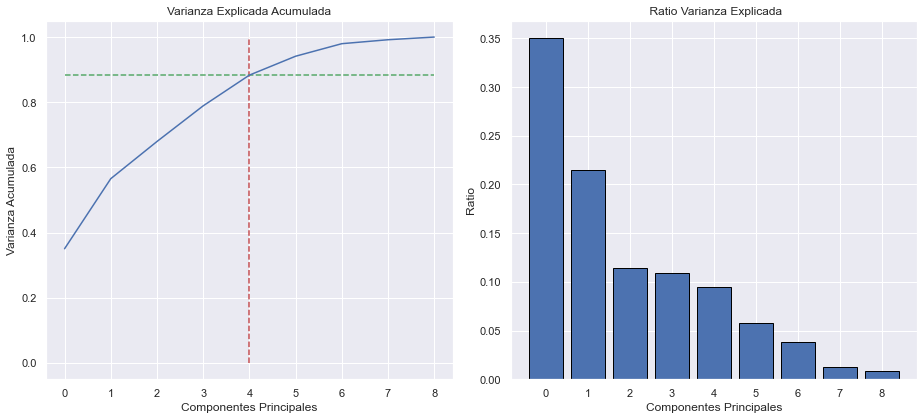

In [44]:
# Graficamente
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

# Varianza acumulada
ax[0].plot(var_acum)

# Líneas de guía
ax[0].vlines(x=4, ymax=1, ymin=0, colors='r', linestyles='--')
ax[0].hlines(y=var_acum[4], xmax=8, xmin=0, colors='g', linestyles='--')

ax[0].set_ylabel('Varianza Acumulada')
ax[0].set_xlabel('Componentes Principales')
ax[0].set_title('Varianza Explicada Acumulada')

# Ratio de varianza explicada
ax[1].bar(
            np.arange(len(pca.explained_variance_ratio_)),
            pca.explained_variance_ratio_,
            edgecolor='black'
)

ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Componentes Principales')
ax[1].set_title(' Ratio Varianza Explicada')

ax[1].set_xticks(np.arange(len(pca.explained_variance_ratio_)))

fig.tight_layout()
plt.show();

#### Se esta en condiciones de transformar/proyectar el dataset a esta nueva base de ahora 5 componentes y que explica casi un 90% de la varianza en los datos. La tranformación se realiza de la siguiente manera (aplicando el siguiente [algoritmo](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html)):

In [45]:
# Inicializo el incrementalPCA para la cantidad de componentes seleccionada
acp_final = IncrementalPCA(n_components=5)

In [46]:
# Fit y Transform de los datos al nuevo espacio vectorial  
acp_proy = acp_final.fit_transform(df_ACP)

In [47]:
# Verifico la forma del nuevo df
acp_proy.shape

(696, 5)

In [48]:
# Convierto en el array acp_proy en df
df_ACP_proy = pd.DataFrame(
    acp_proy,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
)
df_ACP_proy.head()

,PC1,PC2,PC3,PC4,PC5
0,0.244050,0.142415,-0.992519,-0.595970,-0.326938
1,2.829196,-0.876135,0.871385,0.152267,1.387119
2,-1.795622,-0.441477,0.382530,0.674612,-0.364798
3,1.019758,-0.952211,0.322748,-0.159247,0.625074
4,-2.504100,-0.857083,-0.122397,-1.040674,0.604026


### A modo de resumen:
#### - df_ACP_proy es un nuevo dataframe que explica cerca del 90% de la varianza original de los datos  seleccionados para este análisis y que redujo su dimensionalidad (N° de columnas) de 9 a 5 a través de un ACP.

## **Generación de Algoritmos de Predicción**

#### Luego del análisis exploratorio y tratamiento de los datos que permitió conocer en profundidad la naturaleza del dataset seleccionado, se proponen distintos algoritmos de predicción. Más especificamente, se trata de un problema de clasificación binaria.

#### Se entrenaran modelos para los siguientes algoritmos:
    - Decision Tree
    - Random Forest
    - XG Boost
    - Logistic Regression
#### Luego, se evaluará la calidad de cada uno de ellos a través de dos métricas:
    - Accuracy Score
    - Confusion MAtrix

#### En primera instancia, se realiza el preprocesamiento del dataset hastla llegar a la definición de la matriz X y el vector y sobre el cual se realizan las predicciones.

#### A grandes rasgos, serán eliminados los outliers, las filas que contuvieran valores nulos y la información será normalizada con el fin de obtener un dataset correctamente balanceado.

#### Dado que el ACP realizado limita el dataset a muy pocas variables, se decide descartar en primera instancia dicho análisis en esta etapa.

#### Se eliminan las columnas que no aportan a la construcción del modelo de predicción. Como comentario, la columna "labels" es igual a la columna "status" pero de caracter numérico y es al mismo tiempo la variable a predecir.

In [49]:
df_2.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'foundation_year'],
      dtype='object')

In [50]:
df_2 = df_2.drop(columns=['Unnamed: 0', 
                          'state_code',
                          'latitude',
                          'longitude',
                          'zip_code',
                          'id',
                          'city',
                          'Unnamed: 6',
                          'name',
                          'founded_at',
                          'closed_at',
                          'first_funding_at',
                          'last_funding_at',
                          'state_code.1',
                          'category_code',
                          'object_id',
                          'status',
                          'foundation_year'
                                        ])

In [51]:
df_2.shape

(840, 32)

In [52]:
df_2.isna().sum()

labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    144
age_last_milestone_year     144
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top50

#### Valores nulos en las columnas "age_first_milestone_year" y "age_last_milestone_year" indican que nunca tuvieron un "milestone". Se decide rellenar dichos valores nulos con ceros.

In [53]:
df_2['age_first_milestone_year'] = df_2['age_first_milestone_year'].fillna(0)
df_2['age_last_milestone_year'] = df_2['age_last_milestone_year'].fillna(0)

df_2.isna().sum()

labels                      0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
is_top500                   0
dtype: int64

In [54]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 922
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    840 non-null    int64  
 1   age_first_funding_year    840 non-null    float64
 2   age_last_funding_year     840 non-null    float64
 3   age_first_milestone_year  840 non-null    float64
 4   age_last_milestone_year   840 non-null    float64
 5   relationships             840 non-null    int64  
 6   funding_rounds            840 non-null    int64  
 7   funding_total_usd         840 non-null    int64  
 8   milestones                840 non-null    int64  
 9   is_CA                     840 non-null    int64  
 10  is_NY                     840 non-null    int64  
 11  is_MA                     840 non-null    int64  
 12  is_TX                     840 non-null    int64  
 13  is_otherstate             840 non-null    int64  
 14  is_softwar

#### También, y con el objetivo de reducir posibles sezgos, se recomienda normalizar la información previamente. Esta normalización se va aplicar unicamente sobre las variables puramente numéricas y no sobre las que surgieron del porceso de one hot encoding.

In [55]:
normalizar_columnas= [
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'relationships',          
    'funding_rounds',              
    'funding_total_usd',           
    'milestones',
    'avg_participants'
    ]

In [56]:
for i in normalizar_columnas:
    df_2[i] = (df_2[i] - df_2[i].mean()) / df_2[i].std() 

df_2.head()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1,-0.069786,-0.383699,0.654706,0.756949,-0.652793,0.484014,-0.134415,0.889515,1,...,0,1,0,1,0,0,0,0,-0.994238,0
1,1,1.083016,1.997422,1.475847,0.845494,0.171375,1.196048,0.065524,-0.618442,1,...,0,0,1,0,0,1,1,1,0.971545,1
2,1,-0.557243,-1.054264,-0.473528,-0.564642,-0.378071,-0.940055,-0.123217,0.135537,1,...,0,0,0,0,1,0,0,0,0.578389,1
3,1,0.283745,0.403494,1.123498,0.550893,-0.378071,0.484014,0.065021,-0.618442,1,...,0,0,0,0,0,1,1,1,0.228899,1
4,0,-0.971164,-0.837891,-0.972150,-1.201289,-0.790155,-0.228020,-0.129760,-0.618442,1,...,0,0,1,1,0,0,0,0,-0.994238,1


#### Deben definirse las variables que formarán la matriz X. En este caso, todas las columnas excepto aquella que hace referencia al "status" o "labels" de la startup.

In [57]:
X = df_2.drop(columns=['labels'])
X.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,-0.069786,-0.383699,0.654706,0.756949,-0.652793,0.484014,-0.134415,0.889515,1,0,...,0,1,0,1,0,0,0,0,-0.994238,0
1,1.083016,1.997422,1.475847,0.845494,0.171375,1.196048,0.065524,-0.618442,1,0,...,0,0,1,0,0,1,1,1,0.971545,1
2,-0.557243,-1.054264,-0.473528,-0.564642,-0.378071,-0.940055,-0.123217,0.135537,1,0,...,0,0,0,0,1,0,0,0,0.578389,1
3,0.283745,0.403494,1.123498,0.550893,-0.378071,0.484014,0.065021,-0.618442,1,0,...,0,0,0,0,0,1,1,1,0.228899,1
4,-0.971164,-0.837891,-0.972150,-1.201289,-0.790155,-0.228020,-0.129760,-0.618442,1,0,...,0,0,1,1,0,0,0,0,-0.994238,1


In [58]:
X.shape

(840, 31)

 #### Por otro lado, el vector "y" sobre el cual se predice se encuentra representado por la columna "status" o labels la cual es de caracter binario e indica si una startup fue adquirida (éxito=1) o debio cerrar (fracaso=0). 

In [59]:
df_2['labels'].value_counts()

1    552
0    288
Name: labels, dtype: int64

In [60]:
df_2['labels'].isna().sum()

0

In [61]:
# Defino el vector y:
y = df_2['labels']
print(y.shape, type(y[0]))

(840,) <class 'numpy.int64'>


In [62]:
# Modifico el tipo de la variable y
y = y.astype('int')

#### Ya se encuentran definidos la matriz X y el vector y que era el objetivo de esta primera parte. A continuación, se propone desarrollar un modelo de predicción a partir del algoritmo "Decision Tree Classifier" o arbol de decisión.

### Algoritmo I: Decision Tree

In [63]:
# Divido la matriz X y el vector y en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(588, 31) (252, 31) (588,) (252,)


In [65]:
# Creo el modelo
tree = DecisionTreeClassifier(max_depth=5, random_state=42) # Se propone un valor de max_depth=5

In [66]:
# Entreno el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [67]:
# Realizo una predicción
y_train_pred_1 = tree.predict(X_train) # Predicción en Train
y_test_pred_1 = tree.predict(X_test) # Predicción en Test

In [68]:
# Calculo el accuracy en Train
train_accuracy_1 = accuracy_score(y_train, y_train_pred_1)

# Calculo el accuracy en Test
test_accuracy_1 = accuracy_score(y_test, y_test_pred_1)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_1, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy_1, 1))

% de aciertos sobre el set de entrenamiento: 84.4
% de aciertos sobre el set de evaluación: 77.8


#### Otra manera de cuantificar la calidad del modelo es através de la matriz de confusión.
#### En la misma se indican:
    - Verdaderos Positivos
    - Falsos Positivos
    - Verdaderos Negativos
    - Falsos Negativos
#### Tanto Falsos positivos como negativos son indeseados. Para el caso particular de este problema, se considera igualmente más riesgoso o se castiga más a modelos con mayor cantidad de falsos positivos, ya que implica un gran riego de inversión indicar que una startup fue exitosa cuando en realidad no lo fue.

#### Se determina la matriz de confusión a partir de la comparación entre el vector "y_test" y el vector "y_test_pred_1".

In [69]:
CM_1 = confusion_matrix(y_test, y_test_pred_1)
CM_1

array([[ 38,  41],
       [ 15, 158]], dtype=int64)

#### Por otro lado, se propone hacer uso de otro algoritmol llamado Random Forest. El mismo es muy similar al Decision Tree Classifier. Difieren en que Random Forest utiliza "n" árboles predictores y por lo tanto la predicción final se resuelve por votación y no por el resultado que arroja un único árbol.

### Algoritmo II: Random Forest

In [70]:
# Creo un modelo Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5) # Se propone utilizar 50 árboles

# Entreno al modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [71]:
# Realizo una predicción
y_train_pred_2 = random_forest.predict(X_train) # Predicción en Train
y_test_pred_2 = random_forest.predict(X_test) # Predicción en Test

In [72]:
# Calculo el accuracy en Train
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)

# Calculo el accuracy en Test
test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_2, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy_2, 1))

% de aciertos sobre el set de entrenamiento: 85.0
% de aciertos sobre el set de evaluación: 81.0


#### Se calcula nuevamente la matriz de confusión para este nuevo modelo.

In [73]:
CM_2 = confusion_matrix(y_test, y_test_pred_2)
CM_2

array([[ 38,  41],
       [  7, 166]], dtype=int64)

#### En búsqueda de un mejor modelo, se propone hacer un tuneo de los parametro que caracterizan al modelo de random forest.

In [74]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
# Definicion de los Hyperparámetros
param_grid =  {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 7, 10],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 75, 100, 200]
    }

In [76]:
random_forest_tuned = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

In [77]:
random_forest_tuned.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=50,
                                              random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 200]})

In [78]:
random_forest_tuned.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

#### Con estos nuevos mejores parámetros se calculan nuevamente las métricas del nuevo modelo mejorado. 

In [79]:
random_forest_2 = RandomForestClassifier(
                    bootstrap=True,
                    max_features='auto',
                    min_samples_leaf=1,
                    random_state=42,
                    n_estimators=25,
                    max_depth=5,
                    min_samples_split=5
                                        )

In [80]:
random_forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=25,
                       random_state=42)

In [81]:
# Realizo una predicción
y_train_pred_3 = random_forest_2.predict(X_train) # Predicción en Train
y_test_pred_3 = random_forest_2.predict(X_test) # Predicción en Test

In [82]:
# Calculo el accuracy en Train
train_accuracy_3 = accuracy_score(y_train, y_train_pred_3)

# Calculo el accuracy en Test
test_accuracy_3 = accuracy_score(y_test, y_test_pred_3)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_3, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy_3, 1))

% de aciertos sobre el set de entrenamiento: 84.4
% de aciertos sobre el set de evaluación: 81.3


In [83]:
CM_3 = confusion_matrix(y_test, y_test_pred_3)
CM_3

array([[ 39,  40],
       [  7, 166]], dtype=int64)

#### En este caso se disminuyo la cantidad de falsos positivos en una unidad solamente. Invita a pensar que el costo computacional invertido no valio la pena.

### Algoritmo III: XG Boost

In [84]:
xgb_1 = xgb.XGBClassifier(objective='binary:logistic',
                            n_estimators=10,
                            seed=42,
                            max_depth=6,
                            learning_rate=0.01)

In [85]:
xgb_1.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=10, seed=42)

In [86]:
y_train_pred_4 = xgb_1.predict(X_train) 
y_test_pred_4 = xgb_1.predict(X_test)

In [87]:
# Calculo el accuracy en Train
train_accuracy_4 = accuracy_score(y_train, y_train_pred_4)

# Calculo el accuracy en Test
test_accuracy_4 = accuracy_score(y_test, y_test_pred_4)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_4, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy_4, 1))

% de aciertos sobre el set de entrenamiento: 86.6
% de aciertos sobre el set de evaluación: 75.4


In [88]:
CM_4 = confusion_matrix(y_test, y_test_pred_4)
CM_4

array([[ 41,  38],
       [ 24, 149]], dtype=int64)

In [89]:
param_grid_2 =  {
    'objective':['binary:logistic'],
    'n_estimators': [5, 10, 20, 25, 50, 75, 100],
    'seed' : [42],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate' : [0.01] 
    }

In [90]:
xgb_tuned = GridSearchCV(xgb_1, param_grid=param_grid_2, cv=5)

In [91]:
xgb_tuned.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(learning_rate=0.01, max_depth=6,
                                     n_estimators=10, seed=42),
             param_grid={'learning_rate': [0.01],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10, 20, 25, 50, 75, 100],
                         'objective': ['binary:logistic'], 'seed': [42]})

In [92]:
xgb_tuned.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'seed': 42}

In [93]:
xgb_2 = xgb.XGBClassifier(objective='binary:logistic',
                            n_estimators=100,
                            seed=42,
                            max_depth=4,
                            learning_rate=0.01)

xgb_2.fit(X_train, y_train)

y_train_pred_5 = xgb_2.predict(X_train) 
y_test_pred_5 = xgb_2.predict(X_test)

In [94]:
# Calculo el accuracy en Train
train_accuracy_5 = accuracy_score(y_train, y_train_pred_5)

# Calculo el accuracy en Test
test_accuracy_5 = accuracy_score(y_test, y_test_pred_5)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_5, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy_5, 1))

% de aciertos sobre el set de entrenamiento: 85.7
% de aciertos sobre el set de evaluación: 80.2


In [95]:
CM_5 = confusion_matrix(y_test, y_test_pred_5)
CM_5

array([[ 43,  36],
       [ 14, 159]], dtype=int64)

### Algoritmo IV: Logistic Regression

In [96]:
# Iniciamos el modelo:
logreg = LogisticRegression()

In [97]:
# Definimos los parámetros para GridSearch:
param_grid = [{'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']}]

In [98]:
gs = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
maxef = gs.fit(X_train, y_train)
"Máxima efectividad: %f usando %s" % (maxef.best_score_, maxef.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.6s finished


"Máxima efectividad: 0.758503 usando {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}"

In [99]:
new_logreg = LogisticRegression(C = 0.1, penalty = 'l2', solver ='newton-cg')
new_logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [100]:
y_train_pred_6 = new_logreg.predict(X_train) 
y_test_pred_6 = new_logreg.predict(X_test)

In [101]:
# Calculo el accuracy en Train
train_accuracy_6 = accuracy_score(y_train, y_train_pred_6)

# Calculo el accuracy en Test
test_accuracy_6 = accuracy_score(y_test, y_test_pred_6)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy_6, 1))
print('% de aciertos sobre el set de evaluación:', round(100*test_accuracy_6, 1))

% de aciertos sobre el set de entrenamiento: 77.7
% de aciertos sobre el set de evaluación: 78.6


In [102]:
CM_6 = confusion_matrix(y_test, y_test_pred_6)
CM_6

array([[ 41,  38],
       [ 16, 157]], dtype=int64)

#### A modo de resumen se presentan conjuntamente las métricas obtenidas para cada uno de los modelos desarrollados (en su mejor versión/hipertuneados):

In [103]:
test_accuracies = {
    'Decision Tree' : round(test_accuracy_1, 3),
    'Random Forest' : round(test_accuracy_3, 3),
    'XG Boost' : round(test_accuracy_5, 3),
    'Logistic Regression' : round(test_accuracy_6, 3)
}

In [104]:
test_accuracies

{'Decision Tree': 0.778,
 'Random Forest': 0.813,
 'XG Boost': 0.802,
 'Logistic Regression': 0.786}

#### Desde el punto de vista de esta métrica el modelo de mayor precisión es el de Random Forest

In [105]:
CM_s = {
    'Decision Tree' : CM_1,
    'Random Forest' : CM_3,
    'XG Boost' : CM_5,
    'Logistic Regression' : CM_6  
}

In [106]:
CM_s

{'Decision Tree': array([[ 38,  41],
        [ 15, 158]], dtype=int64),
 'Random Forest': array([[ 39,  40],
        [  7, 166]], dtype=int64),
 'XG Boost': array([[ 43,  36],
        [ 14, 159]], dtype=int64),
 'Logistic Regression': array([[ 41,  38],
        [ 16, 157]], dtype=int64)}

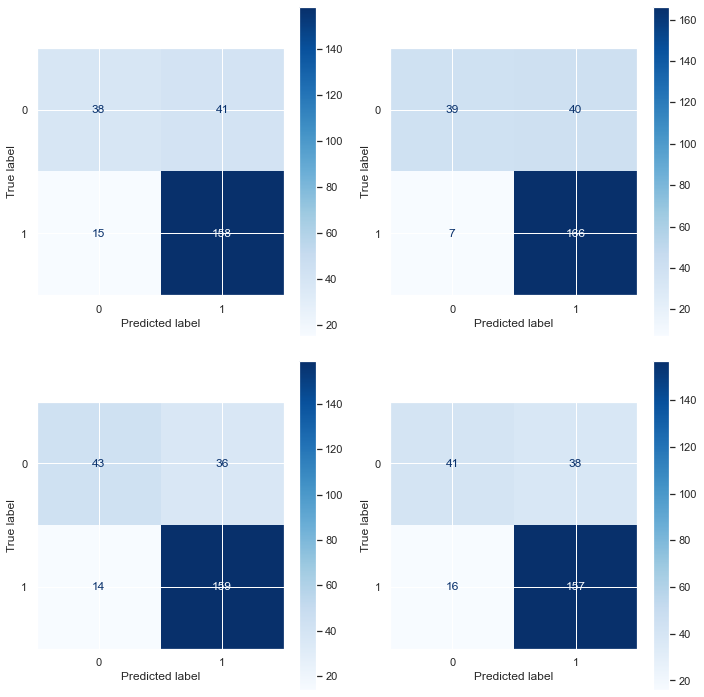

In [107]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0] = plot_confusion_matrix(tree, X_test, y_test, ax=axs[0,0], cmap='Blues')
axs[0, 1] = plot_confusion_matrix(random_forest_2, X_test, y_test, ax=axs[0,1], cmap='Blues') 
axs[1, 0] = plot_confusion_matrix(xgb_2, X_test, y_test, ax=axs[1, 0], cmap='Blues') 
axs[1, 1] = plot_confusion_matrix(new_logreg, X_test, y_test, ax=axs[1,1], cmap='Blues') 

fig.tight_layout()
plt.savefig('CM_s.jpg')
plt.show();

#### A modo de conclusión y tal como se mencionó anteriormente; el modelo óptimo para este problema que se busca resolver, es aquel que arroje menor cantidad de falsos positivos. Por lo tanto, el modelo que mejor se adapta al problema que se busca solucionar es el de  **XG-Boost**.